In [380]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
import hvplot.pandas
import matplotlib.pyplot as plt

In [381]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
productivity_df = pd.read_csv('Resources/Impact_of_Remote_Work_on_Mental_Health_Final.csv')

# Review the DataFrame
productivity_df.head()

,Employee_ID,Age,Gender,Job_Role,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Satisfaction_with_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Hybrid,47,7,Depression,No,Decrease,Unsatisfied,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,Remote,52,4,Anxiety,No,Increase,Satisfied,Weekly,Good,Asia
2,EMP0004,27,Male,Software Engineer,Onsite,32,8,Depression,Yes,Increase,Unsatisfied,NaN,Poor,Europe
3,EMP0005,49,Male,Sales,Onsite,35,12,NaN,Yes,Decrease,Unsatisfied,Weekly,Average,North America
4,EMP0006,59,Non-binary,Sales,Hybrid,39,3,NaN,No,Increase,Unsatisfied,NaN,Average,South America


In [382]:
productivity_df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Work_Location',
       'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Satisfaction_with_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region'],
      dtype='object')

In [383]:
# Split and preprocess data into our features and target arrays
y = pd.get_dummies(productivity_df.Productivity_Change,dtype='int')['Increase']
X = pd.get_dummies(productivity_df.drop([
    'Employee_ID',
    'Productivity_Change', 
    'Satisfaction_with_Remote_Work'
    ], axis=1),dtype='int')

In [384]:
#Counting the number of data points for the target variable productivity
len(y)

2235

In [385]:
#counting the number of rows for the feature variables
len(X)

2235

In [386]:
#number fo unique values for each feature variable
X.nunique()

Age                                      39
Hours_Worked_Per_Week                    41
Number_of_Virtual_Meetings               16
Gender_Female                             2
Gender_Male                               2
Gender_Non-binary                         2
Gender_Prefer not to say                  2
Job_Role_Data Scientist                   2
Job_Role_Designer                         2
Job_Role_HR                               2
Job_Role_Marketing                        2
Job_Role_Project Manager                  2
Job_Role_Sales                            2
Job_Role_Software Engineer                2
Work_Location_Hybrid                      2
Work_Location_Onsite                      2
Work_Location_Remote                      2
Mental_Health_Condition_Anxiety           2
Mental_Health_Condition_Burnout           2
Mental_Health_Condition_Depression        2
Access_to_Mental_Health_Resources_No      2
Access_to_Mental_Health_Resources_Yes     2
Physical_Activity_Daily         

In [387]:
# Not proceeding with binning for the above columns as the distribution seems to be equal..tried binning but no change in accuracy 

In [388]:
#Getting the list of x variables
X.columns

Index(['Age', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings',
       'Gender_Female', 'Gender_Male', 'Gender_Non-binary',
       'Gender_Prefer not to say', 'Job_Role_Data Scientist',
       'Job_Role_Designer', 'Job_Role_HR', 'Job_Role_Marketing',
       'Job_Role_Project Manager', 'Job_Role_Sales',
       'Job_Role_Software Engineer', 'Work_Location_Hybrid',
       'Work_Location_Onsite', 'Work_Location_Remote',
       'Mental_Health_Condition_Anxiety', 'Mental_Health_Condition_Burnout',
       'Mental_Health_Condition_Depression',
       'Access_to_Mental_Health_Resources_No',
       'Access_to_Mental_Health_Resources_Yes', 'Physical_Activity_Daily',
       'Physical_Activity_Weekly', 'Sleep_Quality_Average',
       'Sleep_Quality_Good', 'Sleep_Quality_Poor', 'Region_Africa',
       'Region_Asia', 'Region_Europe', 'Region_North America',
       'Region_Oceania', 'Region_South America'],
      dtype='object')

In [389]:
# Target variable unique values and their counts
y.value_counts()

Increase
0    1195
1    1040
Name: count, dtype: int64

In [390]:
#chcking the X  variables in the Data Frame
X.head()

,Age,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Gender_Female,Gender_Male,Gender_Non-binary,Gender_Prefer not to say,Job_Role_Data Scientist,Job_Role_Designer,Job_Role_HR,...,Physical_Activity_Weekly,Sleep_Quality_Average,Sleep_Quality_Good,Sleep_Quality_Poor,Region_Africa,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,47,7,0,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1,40,52,4,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,27,32,8,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,49,35,12,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,59,39,3,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [391]:

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [392]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [393]:
#Performing Principal component analysis to find the most influential feature variables as our data set had a large number of feature variables
from sklearn.decomposition import PCA
#Apply PCA
pca = PCA(n_components=20)
pca.fit_transform(X_train_scaled)


array([[ 0.85112846, -0.38930906,  1.45160542, ...,  0.83461801,
        -0.68821788,  0.21616686],
       [ 1.79346338, -0.06700471, -0.88986902, ...,  0.50322663,
         0.42356645, -0.61157975],
       [ 1.46888581,  1.43470152,  1.10119814, ...,  1.16856252,
        -1.19817655,  0.43757427],
       ...,
       [-0.73834647,  1.80120358,  0.52181083, ...,  0.33884816,
        -0.70285886, -0.12837219],
       [ 1.98699279,  0.39937655, -0.54706908, ...,  0.56805666,
         0.68047752, -0.26508364],
       [ 2.0858975 ,  1.65829807,  0.34268761, ..., -0.07656334,
         0.66631761, -1.31511053]])

In [394]:
#Determining the explained variance by each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Total explained variance:", sum(explained_variance))

Explained variance by each component: [0.06160571 0.05131333 0.04849841 0.04707063 0.0461547  0.04561602
 0.0422551  0.04187104 0.04069299 0.03941136 0.03843106 0.03779877
 0.03744785 0.03730833 0.03637778 0.03608873 0.03506317 0.03457872
 0.03374559 0.03322603]
Total explained variance: 0.8245552956104235


In [395]:
# Define the model - deep neural network Model
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 40)             │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,261 (16.64 KB)

 Trainable params: 4,261 (16.64 KB)

 Non-trainable params: 0 (0.00 B)

In [396]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model

nn_hist = nn.fit(X_train_scaled, y_train, epochs=25, validation_split=0.2)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5008 - loss: 0.7007 - val_accuracy: 0.5476 - val_loss: 0.6959
Epoch 2/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5762 - loss: 0.6807 - val_accuracy: 0.5446 - val_loss: 0.6960
Epoch 3/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5790 - loss: 0.6725 - val_accuracy: 0.5268 - val_loss: 0.6954
Epoch 4/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 0.6624 - val_accuracy: 0.5000 - val_loss: 0.7002
Epoch 5/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6503 - loss: 0.6461 - val_accuracy: 0.5119 - val_loss: 0.7005
Epoch 6/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - loss: 0.6308 - val_accuracy: 0.4911 - val_loss: 0.7101
Epoch 7/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6751 - loss: 0.6214 - val_accuracy: 0.4881 - val_loss: 0.7129
Epoch 8/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6986 - loss: 0.6040 - val_accuracy: 0.4940 - val_loss:

In [397]:
# Save the model
nn.save("productivity_3.h5")

<Axes: >

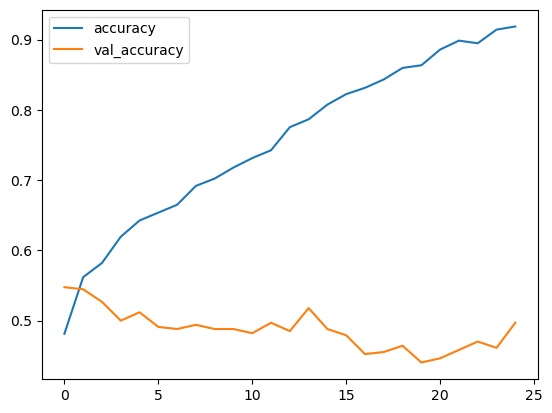

In [398]:
pd.DataFrame(nn_hist.history)[['accuracy','val_accuracy']].plot()

In [399]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

18/18 - 0s - 2ms/step - accuracy: 0.5081 - loss: 1.2251
Loss: 1.225136637687683, Accuracy: 0.5080500841140747


In [400]:
#Predicting the values for x_test data
ypred = nn.predict(X_test_scaled)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [401]:
#Printing the predicted y values which is an array
ypred

array([[4.97154482e-02],
       [4.89813052e-02],
       [2.59999186e-02],
       [2.78628856e-01],
       [5.51619828e-01],
       [7.26271644e-02],
       [4.41809185e-02],
       [2.06136599e-01],
       [6.35458855e-03],
       [8.85722220e-01],
       [8.16198438e-02],
       [8.20655167e-01],
       [3.78549486e-01],
       [6.84855342e-01],
       [8.42521846e-01],
       [4.17358540e-02],
       [8.51180136e-01],
       [7.08562434e-02],
       [6.76315799e-02],
       [5.73769771e-02],
       [9.86087441e-01],
       [6.39824495e-02],
       [3.59230489e-01],
       [3.87326032e-02],
       [1.70524761e-01],
       [7.96238482e-01],
       [5.98723106e-02],
       [4.79526669e-01],
       [5.86122274e-01],
       [3.33175033e-01],
       [5.50097115e-02],
       [5.75913668e-01],
       [3.07654589e-01],
       [9.39005136e-01],
       [1.91503346e-01],
       [2.53078431e-01],
       [1.94974571e-01],
       [2.60009795e-01],
       [1.90353692e-01],
       [7.64280200e-01],


In [402]:
#Number of data points predicted
len(ypred)

559

In [403]:
#creating a list to hold the predicted y values and extracting the list from the array
pred=[]
for x in ypred:
    pred.append(x[0])

In [404]:
#Predicted y values for x test data
pred

[0.04971545,
 0.048981305,
 0.025999919,
 0.27862886,
 0.5516198,
 0.072627164,
 0.04418092,
 0.2061366,
 0.0063545885,
 0.8857222,
 0.081619844,
 0.82065517,
 0.3785495,
 0.68485534,
 0.84252185,
 0.041735854,
 0.85118014,
 0.07085624,
 0.06763158,
 0.057376977,
 0.98608744,
 0.06398245,
 0.3592305,
 0.038732603,
 0.17052476,
 0.7962385,
 0.05987231,
 0.47952667,
 0.5861223,
 0.33317503,
 0.05500971,
 0.57591367,
 0.3076546,
 0.93900514,
 0.19150335,
 0.25307843,
 0.19497457,
 0.2600098,
 0.19035369,
 0.7642802,
 0.056042794,
 0.07107209,
 0.9432152,
 0.87871647,
 0.2224622,
 0.16922389,
 0.7535584,
 0.4260138,
 0.78091127,
 0.9260988,
 0.7305138,
 0.3704179,
 0.007905088,
 0.29200035,
 0.9207144,
 0.05542334,
 0.116681226,
 0.07846664,
 0.6673323,
 0.44273126,
 0.30284533,
 0.033351816,
 0.100912265,
 0.15468277,
 5.067162e-05,
 0.32674468,
 0.023576226,
 0.96114135,
 0.72130483,
 0.6440555,
 0.2574288,
 0.610484,
 0.6337427,
 0.21265392,
 0.114628084,
 0.20457655,
 0.24330913,
 0.28

In [405]:
#Roundingthe decimals to whole numbers
pred_values = [round(x) for x in pred]
print(pred_values)


[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 

In [406]:
#Printing the actual vs Predicted values for test data
pred_fit =pd.DataFrame({'actual':y_test,'Predict':pred_values})
pred_fit


,actual,Predict
370,0,0
1681,0,0
272,0,0
1163,0,0
684,1,1
...,...,...
1374,1,1
2009,0,0
1750,1,0
430,0,1
